In [1]:
import pandas as pd
import pickle
import copy
import cobra
import matplotlib.pyplot as plt
from cobra.io import read_sbml_model,write_sbml_model
from cobra import Model, Reaction, Metabolite
from functools import reduce 
%matplotlib inline

In [2]:
mutant1 = read_sbml_model('mutant1.xml')

In [3]:
model2 = read_sbml_model('model2.xml')

In [4]:
model2_reactions = {}
for i in model2.reactions:
    x=i.id
    y=i.build_reaction_string()
    model2_reactions[x] = y

In [5]:
mutant1_reactions = {}
for i in mutant1.reactions:
    x=i.id
    y=i.build_reaction_string()
    mutant1_reactions[x] = y

In [6]:
model2_unique = {}
for x in model2_reactions:
    if x in mutant1_reactions: continue
    else:
        y = model2_reactions[x]
        if x == 'BIOMASS_SCO': continue
        else:
            model2_unique[x] = y

# Why citrate essential for growth

In [7]:
M = mutant1.medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [8]:
M

{'EX_ca2_e': 1000.0,
 'EX_cit_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_hdca_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_met__L_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_no3_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [9]:
mutant1.slim_optimize()

4.198353001231938

In [10]:
medium = mutant1.medium
medium["EX_cit_e"] = 0.0
#medium["EX_co2_e"] = 0.0
#medium['EX_h_e'] = 0.0
mutant1.medium = medium

Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.
Could not identify an external compartment by name and choosing one with the most boundary reactions. That might be complete nonsense or change suddenly. Consider renaming your compartments using `Model.compartments` to fix this.


In [11]:
mutant1.slim_optimize()

0.0

 ### How can you make model not require citrate

#### Kreb's cycle 

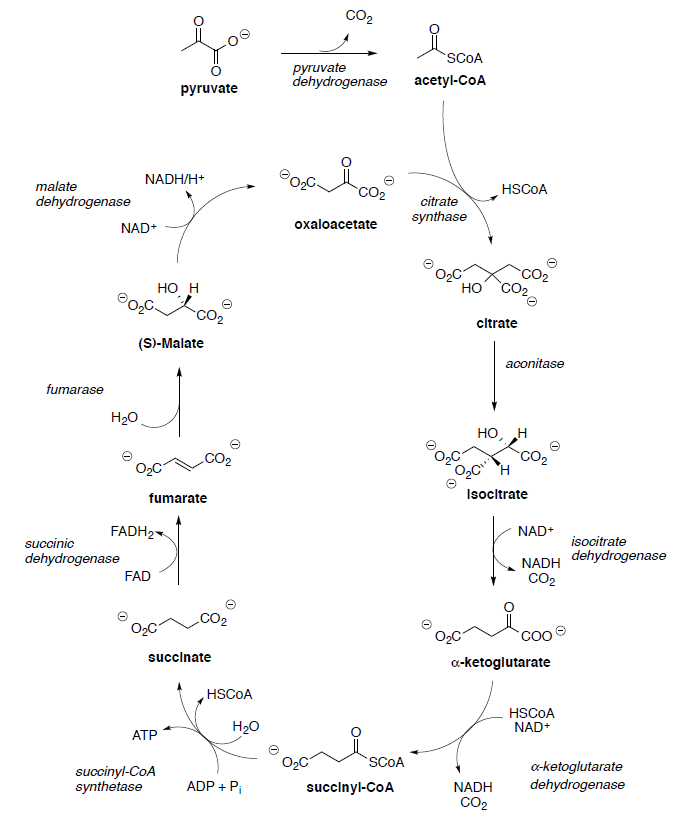

In [12]:
mutant1.reactions.CS

Reaction identifier,CS
Name,Citrate synthase
Memory address,0x1ef77c6bb20
Stoichiometry,accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c Acetyl-CoA + H2O H2O + Oxaloacetate --> Citrate + Coenzyme A + H+
GPR,SC73020_02016 or SC73020_04330 or SC73020_05061
Lower bound,0.0
Upper bound,1000.0


In [13]:
mutant1.reactions.ACS

Reaction identifier,ACS
Name,Acetyl-CoA synthetase
Memory address,0x1ef777c6f70
Stoichiometry,ac_c + atp_c + coa_c --> accoa_c + amp_c + ppi_c Acetate + ATP C10H12N5O13P3 + Coenzyme A --> Acetyl-CoA + AMP C10H12N5O7P + Diphosphate
GPR,SC73020_03537 or SC73020_04369 or SC73020_06598
Lower bound,0.0
Upper bound,1000.0


In [14]:
mutant1.reactions.ACONT

Reaction identifier,ACONT
Name,Aconitate hydratase
Memory address,0x1ef77795eb0
Stoichiometry,cit_c <=> icit_c Citrate <=> Isocitrate
GPR,SC73020_01854
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
mutant1.reactions.ACONTb

Reaction identifier,ACONTb
Name,"Aconitase (half-reaction B, Isocitrate hydro-lyase)"
Memory address,0x1ef777a8dc0
Stoichiometry,acon_C_c + h2o_c <=> icit_c Cis-Aconitate + H2O H2O <=> Isocitrate
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [16]:
mutant1.reactions.ICDHyr

Reaction identifier,ICDHyr
Name,Isocitrate dehydrogenase (NADP)
Memory address,0x1ef785c8e80
Stoichiometry,icit_c + nadp_c <=> akg_c + co2_c + nadph_c Isocitrate + Nicotinamide adenine dinucleotide phosphate <=> 2-Oxoglutarate + CO2 CO2 + Nicotinamide adenine dinucleotide phosphate - reduced
GPR,SC73020_06375
Lower bound,-1000.0
Upper bound,1000.0


In [17]:
try:
    print(mutant1.reactions.ATPS4r)
except:
    print('Absent')

Absent


In [18]:
try:
    print(model2.reactions.ATPS4r)
except:
    print('Absent')

ATPS4r: adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c


In [19]:
try:
    print(mutant1.reactions.ATPM)
except:
    print('Absent')

ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c


### Adding ATP Hydrolysis

In [20]:
try:
    print(mutant1.reactions.CITMS)
except:
    print('Absent')

Absent


In [21]:
try:
    print(mutant1.reactions.CITt7)
except:
    print('Absent')

Absent


In [22]:
li = ['CITt7','ATPS4r']

In [23]:
for x in li:
    reaction = model2.reactions.get_by_id(x)
    print(reaction)
    mutant1.add_reactions([reaction])
    print(mutant1.slim_optimize())

CITt7: cit_e + succ_c --> cit_c + succ_e
0.0
ATPS4r: adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
0.0


In [24]:
for x in model2_unique:
    reaction = model2.reactions.get_by_id(x)
    print(reaction)
    mutant1.add_reactions([reaction])
    print(mutant1.slim_optimize())

ACTS1: ACPact_c + malcoa_c <=> coa_c + malACPact_c
0.0
ACTS10: actint1ACPact_c + h_c + nadph_c --> actint2ACPact_c + nadp_c
0.0
ACTS11: actint2ACPact_c --> actint3ACPact_c + 2.0 h2o_c
0.0
ACTS12: actint3ACPact_c --> actint4ACPact_c + h2o_c
0.0
ACTS15: dnpaACPact_c + h_c + nadph_c --> ddhkACPact_c + nadp_c
0.0
ACTS2: accoa_c + h_c + malACPact_c --> actACPact_c + co2_c + coa_c
0.0
ACTS3: actACPact_c + h_c + malcoa_c --> co2_c + coa_c + pk6ACPact_c
0.0
ACTS4: h_c + malcoa_c + pk6ACPact_c --> co2_c + coa_c + pk8ACPact_c
0.0
ACTS5: h_c + malcoa_c + pk8ACPact_c --> co2_c + coa_c + pk10ACPact_c
0.0
ACTS6: h_c + malcoa_c + pk10ACPact_c --> co2_c + coa_c + pk12ACPact_c
0.0
ACTS7: h_c + malcoa_c + pk12ACPact_c --> co2_c + coa_c + pk14ACPact_c
0.0
ACTS8: h_c + malcoa_c + pk14ACPact_c --> co2_c + coa_c + pk16ACPact_c
0.0
ACTS9: pk16ACPact_c --> actint1ACPact_c
0.0
6PHBG: h2o_c + salcn6p_c --> 2hymeph_c + g6p_c
0.0
AAMYLe: 14glucan_e --> malthx_e
0.0
G3PD2: glyc3p_c + nadp_c <=> dhap_c + h_c + nadp

0.0
BWCOGDS1: bwco_c + gtp_c + h_c --> bwco1gdp_c + ppi_c
0.0
BWCOGDS2: bwco1gdp_c + gtp_c + h_c --> bwcogdp_c + ppi_c
0.0
BWCOS: mptamp_c + wco_c --> amp_c + bwco_c + cu2_c
0.0
CBIAT: atp_c + cbi_c + h_c <=> adocbi_c + pppi_c
0.0
CBLAT: atp_c + cbl1_c + h_c <=> adocbl_c + pppi_c
0.0
CFL: chor_c + h_c + ins_c + pep_c --> co2_c + fut_c + h2o_c + pi_c + pyr_c
0.0
COCHL: atp_c + cobalt2_c + h2o_c + hgbam_c --> adp_c + co2dam_c + 2.0 h_c + pi_c
0.0
CPC3MT: amet_c + copre3_c --> ahcys_c + copre4_c
0.0
CPC6R: copre6_c + h_c + nadph_c --> codhpre6_c + nadp_c
0.0
CPC8MM: copre8_c <=> cobya_c
0.0
CPMPS: gtp_c + h2o_c --> cpmp_c + ppi_c
0.0
CYRDAAT: atp_c + co1dam_c + h_c --> adcobdam_c + pppi_c
0.0
CYRDAS: 2.0 atp_c + cobya_c + 2.0 gln__L_c + h2o_c --> 2.0 adp_c + co2dam_c + 2.0 glu__L_c + h_c + ppi_c
0.0
DHFUTALS: dhxfut_c + nad_c --> cdhxfut_c + h_c + nadh_c
0.0
DHNAS: cdhxfut_c --> dh6na_c + glyald_c
0.0
DHNPTE: dhnpt_c <=> dhmpt_c
0.0
EGMEACPR: egmeACP_c + h_c + nadph_c --> gmeACP_c + nadp_

0.0
DASYNi150: ctp_c + h_c + pai150_c --> cdpdiC15g_c + ppi_c
0.0
DASYNi160: ctp_c + h_c + pai160_c --> cdpdiC16g_c + ppi_c
0.0
DASYNi170: ctp_c + h_c + pai170_c --> cdpdiC17g_c + ppi_c
0.0
DASYNi180: ctp_c + h_c + pai180_c --> cdpdiC18g_c + ppi_c
0.0
GPDDA3: g3ps_c + h2o_c --> glyc3p_c + h_c + ser__L_c
0.0
PGSA150: cdpdptdecg_c + glyc3p_c --> cmp_c + h_c + pgp150_c
0.0
PGSA170: cdpdhepdecg_c + glyc3p_c --> cmp_c + h_c + pgp170_c
0.0
PGSAai150: cdpdaiC15g_c + glyc3p_c --> cmp_c + h_c + pgpai150_c
0.0
PGSAai170: cdpdaiC17g_c + glyc3p_c --> cmp_c + h_c + pgpai170_c
0.0
PGSAi140: cdpdiC14g_c + glyc3p_c --> cmp_c + h_c + pgpi140_c
0.0
PGSAi150: cdpdiC15g_c + glyc3p_c --> cmp_c + h_c + pgpi150_c
0.0
PGSAi160: cdpdiC16g_c + glyc3p_c --> cmp_c + h_c + pgpi160_c
0.0
PGSAi170: cdpdiC17g_c + glyc3p_c --> cmp_c + h_c + pgpi170_c
0.0
PGSAi180: cdpdiC18g_c + glyc3p_c --> cmp_c + h_c + pgpi180_c
0.0
PINOS120: cdpdddecg_c + inost_c --> cmp_c + h_c + pi120_c
0.0
PINOS140: cdpdtdecg_c + inost_c --> cmp

Ignoring reaction 'ATPS4r' since it already exists.


10.621917406710692
RNDR7: cdp_c + 2.0 msh_c --> dcdp_c + h2o_c + mssg_c
10.621917406710692
RNDR8: 2.0 msh_c + udp_c --> dudp_c + h2o_c + mssg_c
10.621917406710692
ATPS4r: adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c
10.621917406710692
FRD8: fum_c + mql9_c --> mqn9_c + succ_c
10.621917406710692
L_LACD4: lac__L_c + mqn9_c --> mql9_c + pyr_c
10.621917406710692
PPK2r: atp_c + ppi_c <=> adp_c + pppi_c
10.621917406710692
G1Dx: glc__D_c + nad_c --> g15lac_c + h_c + nadh_c
10.62191740671042
PFK_3: atp_c + s7p_c --> adp_c + h_c + s17bp_c
10.621917406710764
DX5PGLYCPL: pi_c + xu5p__D_c --> actp_c + g3p_c + h2o_c
10.621917406710764
MMSAD5: coa_c + mmtsa_c + nad_c --> h_c + mmcoa__R_c + nadh_c
10.621917406710827
DHORD5: dhor__S_c + mqn9_c --> mql9_c + orot_c
10.621917406710818
GLUTCOADHc: fad_c + glutcoa_c + h_c --> b2coa_c + co2_c + fadh2_c
10.6219174067111
14GLUCANabc: 14glucan_e + atp_c + h2o_c --> 14glucan_c + adp_c + h_c + pi_c
10.621917406710763
5DGLCNt2r: 5dglcn_e + h_e <=> 5dglcn_c +

Ignoring reaction 'CITt7' since it already exists.


10.621917406710958
CSNt2r: csn_e + h_e <=> csn_c + h_c
10.621917406710958
CYSabc2: atp_c + cys__L_c + h2o_c --> adp_c + cys__L_e + h_c + pi_c
10.621917406710958
CYSt: cys__L_c --> cys__L_e
10.621917406710958
D_LACt2: h_e + lac__D_e <=> h_c + lac__D_c
10.621917406710958
FUMt2_2: fum_e + 2.0 h_e --> fum_c + 2.0 h_c
10.621917406710272
GALCTNt2: galctn__D_e + h_e --> galctn__D_c + h_c
10.621917406710272
GALt4: gal_e + na1_e --> gal_c + na1_c
10.621917406710272
GLYCLTt4: glyclt_e + na1_e --> glyclt_c + na1_c
10.621917406710272
GUAt2r: gua_e + h_e --> gua_c + h_c
10.621917406710272
HISt2r: h_e + his__L_e <=> h_c + his__L_c
10.621917406710272
HOMt2: h_e + hom__L_c --> h_c + hom__L_e
10.621917406710253
IDONt2r: h_e + idon__L_e <=> h_c + idon__L_c
10.62191740671007
INOSTt4: inost_e + na1_e --> inost_c + na1_c
10.62191740671007
LALADGLUt: LalaDglu_e + h_e --> LalaDglu_c + h_c
10.621917406710855
LYSt2r: h_e + lys__L_e --> h_c + lys__L_c
10.621917406710855
MALt2_2: 2.0 h_e + mal__L_e --> 2.0 h_c +

10.622068368879894
FNOR: 2.0 fdxrd_c + h_c + nadp_c <-- 2.0 fdxox_c + nadph_c
10.622068368879894
GLYCAt3: glyc__R_e + na1_e --> glyc__R_c + na1_c
10.622068368879498
DHORD4: dhor__S_c + qnon_c --> hqn_c + orot_c
10.622068368879498
URO: h2o_c + o2_c + urate_c <=> 5hiu_c + h2o2_c
10.62206836887947
OHCUS: h_c + houdic_c <=> alltn_c + co2_c
10.622068368879836
HURH: 5hiu_c + h2o_c <=> h_c + houdic_c
10.622068368879498
DMT: amet_c + dnac_c <=> ahcys_c + dna5mtc_c + h_c
10.622068368879477
GMPS: atp_c + nh4_c + xmp_c --> amp_c + gmp_c + 2.0 h_c + ppi_c
10.6495824644832
IDPS2: 2.0 fdxrd_c + h2mb4p_c + 2.0 h_c <=> 2.0 fdxox_c + h2o_c + ipdp_c
10.649582464483457
SULR_syn: 6.0 fdxox_c + 3.0 h2o_c + h2s_c <=> 6.0 fdxrd_c + 8.0 h_c + so3_c
10.649582464483457
4HXPUHBT: 34hpp_c + 4r5au_c + 2.0 amet_c + h2o_c <=> 2.0 dad_5_c + ddhrb_c + 2.0 h_c + 2.0 met__L_c + nh4_c + oxa_c
10.649582464481918
LPFPLT: ddhrb_c + lppg_c <=> f420_0_c + gmp_c + 2.0 h_c
10.64958246448277
LPPGS: 2plac__L_c + gtp_c + 2.0 h_c <

15.203148637761146
3OAS141: cddec5eACP_c + h_c + malACP_c --> 3ocmrs7eACP_c + ACP_c + co2_c
15.203148637761146
3OAS150: h_c + malACP_c + tridcaACP_c --> 3optdcaACP_c + ACP_c + co2_c
15.203148637761146
3OAS160: h_c + malACP_c + myrsACP_c --> 3opalmACP_c + ACP_c + co2_c
15.203148637761146
3OAS161: h_c + malACP_c + tdeACP_c --> 3ocpalm9eACP_c + ACP_c + co2_c
15.203148637761146
3OAS170: h_c + malACP_c + ptdcaACP_c --> 3ohepdcaACP_c + ACP_c + co2_c
15.203148637761146
3OAS180: h_c + malACP_c + palmACP_c --> 3ooctdACP_c + ACP_c + co2_c
15.203148637761146
3OAS181: h_c + hdeACP_c + malACP_c --> 3ocvac11eACP_c + ACP_c + co2_c
15.203148637761146
3OAS50: h_c + malACP_c + ppACP_c --> 3optnACP_c + ACP_c + co2_c
15.203148637761064
3OAS60: butACP_c + h_c + malACP_c --> 3ohexACP_c + ACP_c + co2_c
15.203148637761064
3OAS70: h_c + malACP_c + ptnACP_c --> 3ohepACP_c + ACP_c + co2_c
15.203148637761064
3OAS80: h_c + hexACP_c + malACP_c --> 3ooctACP_c + ACP_c + co2_c
15.203148637761064
3OAS90: h_c + hepACP_c

15.59829055962846
AKGDH2: akg_c + coa_c + nadp_c --> co2_c + nadph_c + succoa_c
15.59829055962838
GLUSx: akg_c + gln__L_c + h_c + nadh_c --> 2.0 glu__L_c + nad_c
15.59829055962838
Niabc: atp_c + h2o_c + ni2_e --> adp_c + h_c + ni2_c + pi_c
15.59829055962838
Piabc: atp_c + h2o_c + pi_e --> adp_c + h_c + 2.0 pi_c
15.59829055962838
2MBCOATA: 2mbcoa_c + ACP_c <=> 2mbACP_c + coa_c
15.59829055962838
ACOATA: ACP_c + accoa_c <=> acACP_c + coa_c
15.59829055962825
BCOATA: ACP_c + btcoa_c <=> butACP_c + coa_c
15.598290559628536
IBCOATA: ACP_c + ibcoa_c <=> coa_c + ibACP_c
15.598290559628445
IVCOATA: ACP_c + ivcoa_c <=> coa_c + ivACP_c
15.598290559628445
KAS15: accoa_c + h_c + malACP_c --> actACP_c + co2_c + coa_c
15.59829055962769
MCOATA: ACP_c + malcoa_c <=> coa_c + malACP_c
15.59829055962769
PCOATA: ACP_c + ppcoa_c <=> coa_c + ppACP_c
15.598290559628559
CYO2a: 2.0 ficytc_c + 6.0 h_c + mql9_c --> 2.0 focytc_c + 6.0 h_e + mqn9_c
15.598290559628497
CYO2b: 2.0 focytc_c + 0.5 o2_c --> 2.0 ficytc_c +

15.598290559628571
PAPAi150: h2o_c + pai150_c --> 12dgri150_c + pi_c
15.598290559628596
PAPAi160: h2o_c + pai160_c --> 12dgri160_c + pi_c
15.598290559627817
PAPAi170: h2o_c + pai170_c --> 12dgri170_c + pi_c
15.5982905596292
TAGS140: 12dgr140_c + myrsACP_c --> ACP_c + tag140_c
15.598290559628731
TAGS150: 12dgr150_c + ptdcaACP_c --> ACP_c + tag150_c
15.598290559628596
TAGS160: 12dgr160_c + palmACP_c --> ACP_c + tag160_c
15.598290559628166
TAGS161: 12dgr161_c + hdeACP_c --> ACP_c + tag161_c
15.598290559628339
TAGSai150: 12dgrai150_c + aiC15ACP_c --> ACP_c + tagai150_c
15.598290559628051
TAGSai170: 12dgrai170_c + aiC17ACP_c --> ACP_c + tagai170_c
15.598290559629014
TAGSi140: 12dgri140_c + iC14ACP_c --> ACP_c + tagi140_c
15.598290559628959
TAGSi150: 12dgri150_c + iC15ACP_c --> ACP_c + tagi150_c
15.598290559629007
TAGSi160: 12dgri160_c + iC16ACP_c --> ACP_c + tagi160_c
15.598290559628037
TAGSi170: 12dgri170_c + iC17ACP_c --> ACP_c + tagi170_c
15.598290559628726
CLt3_2: 2.0 cl_e + h_c --> 2.0

In [25]:
mutant1.medium

{'EX_ca2_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_hdca_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_met__L_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_no3_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [26]:
mutant1.slim_optimize()

16.81967518385583

In [27]:
data=pd.read_excel('C:\\Users\\02700282\\OneDrive - Elanco\\Mycomputer\\German_handover\\FinalReport\\FinalReport\\Data\\ExperimentalConstraints.xlsx')

In [28]:
data

,Strain,Time,Glucose uptake,Lipid uptake (mmol palmitate/L/h),O2 uptake (mmol/L/h),CE (mmol/L/h),Potency (mmol/L/h),NH3 (mmol/L/h),MonensinA,MonensinB
0,730_0,14,8.920047,0.000000,34.8,37.8,0.008539,0.071763,0.012120,0.000000
1,730_7,14,7.389152,0.000000,29.4,31.8,0.003516,0.072902,0.001170,0.002346
2,730_12,14,9.622771,0.000000,35.4,39.0,0.005609,0.053197,0.002761,0.002847
3,730_20,14,9.231999,0.000000,33.6,37.8,0.002728,0.098197,0.001082,0.001646
4,730_0,25,8.920047,0.000000,36.0,37.8,0.001601,0.071763,0.000000,0.001601
5,730_7,25,7.389152,0.000000,31.2,32.4,0.013034,0.072902,0.007481,0.005553
6,730_12,25,9.622771,0.000000,30.6,30.6,0.009110,0.053197,0.004954,0.004157
7,730_20,25,9.231999,0.000000,39.0,41.4,0.009700,0.098197,0.006140,0.003560
8,730_0,38,3.193813,0.726009,28.2,21.6,0.017141,-0.035546,0.016756,0.000384
9,730_7,38,6.376952,0.334304,25.2,23.4,0.048988,-0.002145,0.043588,0.005399


In [29]:
mutant1_models = {}

In [30]:
for s in data.index:
    x = data.loc[s,'Time']
    name='C'+data.loc[s,'Strain']+"-"+str(data.loc[s,'Time'])
    strain=copy.deepcopy(mutant1)
    strain.objective='EX_MonensinA_e0'
    strain.reactions.Growth.lower_bound=0.01
    strain.reactions.EX_MonensinA_e0.lower_bound=float(data.loc[s,'MonensinA'])
    strain.reactions.EX_MonensinB_e0.lower_bound=float(data.loc[s,'MonensinB'])
    strain.reactions.EX_hdca_e.lower_bound=float(-data.loc[s,'Lipid uptake (mmol palmitate/L/h)'])
    strain.reactions.EX_o2_e.lower_bound=float(-data.loc[s,'O2 uptake (mmol/L/h)'])
    strain.reactions.EX_co2_e.upper_bound=data.loc[s,'CE (mmol/L/h)']
    strain.reactions.EX_nh4_e.lower_bound=float(-data.loc[s,'NH3 (mmol/L/h)'])
    strain.reactions.EX_glc__D_e.lower_bound=float(min(0,-data.loc[s,'Glucose uptake']))
    mutant1_models[name]=strain

In [31]:
mutant1_dfs = []

In [ ]:
for i, model_id in enumerate(mutant1_models):
    model = mutant1_models[model_id]
    y = 'mutant1'+'_'+model_id+'.'
    x = 'solution'+str(i)
    try:
        x = cobra.flux_analysis.pfba(model).to_frame()
        x = x.add_prefix(y)
        x = x.reset_index()
        mutant1_dfs.append(x)
    except:
        print("Infeasible",model_id)

In [ ]:
mutant1_reactions = {}

In [ ]:
mutant1_results = reduce(lambda x,y: pd.merge(x,y,how='outer',on='index'),mutant1_dfs)

In [ ]:
for i in mutant1_results.index:
    x = mutant1_results.loc[i,'index']
    x_rea = mutant1.reactions.get_by_id(x).build_reaction_string(use_metabolite_names = False)
    mutant1_reactions[x] = x_rea

In [ ]:
mutant1_reactions1 = {}

In [ ]:
for i in mutant1_results.index:
    x = mutant1_results.loc[i,'index']
    x_rea = mutant1.reactions.get_by_id(x).build_reaction_string(use_metabolite_names = True)
    mutant1_reactions1[x] = x_rea

In [ ]:
mutant1_reactions1_df = pd.DataFrame(mutant1_reactions1.items(), columns=['index', 'Reaction with Rname'])

In [ ]:
mutant1_reactions_df = pd.DataFrame(mutant1_reactions.items(), columns=['index', 'Reaction with RID'])

In [ ]:
temp = pd.merge(mutant1_results,mutant1_reactions_df, how='outer',on='index')
temp1 = pd.merge(temp,mutant1_reactions1_df,how='outer',on='index')

In [ ]:
mutant1_results = temp1

In [ ]:
mutant1_results = mutant1_results.reset_index()

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_MonensinA_e0']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_cit_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_ca2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_cl_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_co2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_cobalt2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_cu2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_fe2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_h2o_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_h_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_hdca_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_k_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_met__L_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_mg2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_mn2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_mobd_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_nh4_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_no3_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_o2_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_pi_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_so4_e']

In [ ]:
mutant1_results[mutant1_results['index'] == 'EX_zn2_e']

In [ ]:
mutant1_results.to_excel('Mutant1_Fluxes_with_no_citrate.xlsx')

In [ ]:
q1 = mutant1_results['mutant1_C730_7-90.fluxes'].quantile(0.95)

In [ ]:
q1

In [ ]:
mutant1_results['mutant1_C730_0-90.fluxes'].quantile(0.95)

In [ ]:
 mutant1_results_90_high_flux = mutant1_results.loc[(mutant1_results['mutant1_C730_0-90.fluxes'] >= 8e-05) | (mutant1_results['mutant1_C730_7-90.fluxes'] >= 8e-05) | (mutant1_results['mutant1_C730_12-90.fluxes'] >= 8e-05) | (mutant1_results['mutant1_C730_20-90.fluxes'] >= 8e-05) ] 

In [ ]:
mutant1_results_90_high_flux.to_excel('mutant1_results_90_high_flux_V2.xlsx')

In [ ]:
medium = mutant1.medium
medium["EX_co2_e"] = 0.0
mutant1.medium = medium

In [ ]:
mutant1.slim_optimize()